## $loss = \frac{1}{n}\sum{|y_i - \hat{y_i}|}$ 求导

In [10]:
from sklearn.datasets import load_boston
data = load_boston()
X,y = data['data'], data['target']
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

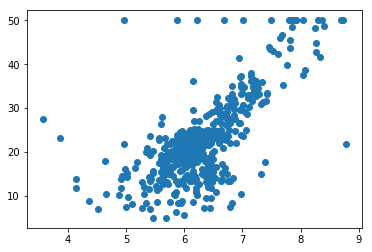

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
def draw_rm_and_price():
    plt.scatter(X[:, 5], y)
draw_rm_and_price()

In [12]:
def price(rm, k, b):
    """f(x) = k * x + b"""
    return k * rm + b  

现在定义这个损失函数 $loss = \frac{1}{n}\sum{|y_i - \hat{y_i}|}$

In [13]:
def loss(y, y_hat): # to evaluate the performance 
    return sum(abs(y_i - y_hat_i) for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))

In [14]:
def gradient(x,y, y_hat):
    n = len(y)
    dk = 0
    db = 0
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
        if y_i >= y_hat_i:
            dk += -1*x_i
            db += -1
        else:
            dk += x_i
            db += 1
    return dk/n,db/n
    


In [15]:
X_rm = X[:, 5]

In [16]:
import random
trying_times = 20000

X, y = data['data'], data['target']

min_loss = float('inf') 

current_k = random.random() * 200 - 100
current_b = random.random() * 200 - 100

learning_rate = 1e-03


update_time = 0

for i in range(trying_times):
    
    price_by_k_and_b = [price(r, current_k, current_b) for r in X_rm]
    
    current_loss = loss(y, price_by_k_and_b)

    if current_loss < min_loss: # performance became better
        min_loss = current_loss
        best_k, best_b = current_k, current_b
        
        if i % 50 == 0: 
            print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))

    k_gradient,b_gradient = gradient(X_rm, y, price_by_k_and_b)

    
    current_k = current_k + (-1 * k_gradient) * learning_rate

    current_b = current_b + (-1 * b_gradient) * learning_rate


When time is : 0, get best_k: 75.4586196569214 best_b: 91.74531933096233, and the loss is: 543.4423489248393
When time is : 50, get best_k: 75.1443879375536 best_b: 91.69531933096209, and the loss is: 541.4175174557039
When time is : 100, get best_k: 74.8301562181858 best_b: 91.64531933096185, and the loss is: 539.392685986567
When time is : 150, get best_k: 74.51592449881801 best_b: 91.59531933096162, and the loss is: 537.3678545174312
When time is : 200, get best_k: 74.20169277945021 best_b: 91.54531933096138, and the loss is: 535.3430230482959
When time is : 250, get best_k: 73.88746106008242 best_b: 91.49531933096114, and the loss is: 533.3181915791597
When time is : 300, get best_k: 73.57322934071462 best_b: 91.4453193309609, and the loss is: 531.2933601100243
When time is : 350, get best_k: 73.25899762134682 best_b: 91.39531933096066, and the loss is: 529.2685286408883
When time is : 400, get best_k: 72.94476590197903 best_b: 91.34531933096042, and the loss is: 527.2436971717524


When time is : 3750, get best_k: 51.89124070435033 best_b: 87.99531933094443, and the loss is: 391.5799887397425
When time is : 3800, get best_k: 51.57700898498289 best_b: 87.94531933094419, and the loss is: 389.5551572706085
When time is : 3850, get best_k: 51.26277726561545 best_b: 87.89531933094395, and the loss is: 387.53032580147516
When time is : 3900, get best_k: 50.948545546248006 best_b: 87.84531933094371, and the loss is: 385.50549433234147
When time is : 3950, get best_k: 50.634313826880565 best_b: 87.79531933094347, and the loss is: 383.48066286320795
When time is : 4000, get best_k: 50.32008210751312 best_b: 87.74531933094323, and the loss is: 381.45583139407455
When time is : 4050, get best_k: 50.00585038814568 best_b: 87.695319330943, and the loss is: 379.43099992494086
When time is : 4100, get best_k: 49.69161866877824 best_b: 87.64531933094275, and the loss is: 377.40616845580723
When time is : 4150, get best_k: 49.3773869494108 best_b: 87.59531933094252, and the loss 

When time is : 7450, get best_k: 28.638093471157756 best_b: 84.29531933092676, and the loss is: 241.74246002384862
When time is : 7500, get best_k: 28.323861751790137 best_b: 84.24531933092652, and the loss is: 239.717628554714
When time is : 7550, get best_k: 28.009630032422518 best_b: 84.19531933092628, and the loss is: 237.6927970855794
When time is : 7600, get best_k: 27.6953983130549 best_b: 84.14531933092604, and the loss is: 235.6679656164446
When time is : 7650, get best_k: 27.38116659368728 best_b: 84.0953193309258, and the loss is: 233.64313414731
When time is : 7700, get best_k: 27.06693487431966 best_b: 84.04531933092557, and the loss is: 231.6183026781752
When time is : 7750, get best_k: 26.75270315495204 best_b: 83.99531933092533, and the loss is: 229.593471209041
When time is : 7800, get best_k: 26.43847143558442 best_b: 83.94531933092509, and the loss is: 227.56863973990616
When time is : 7850, get best_k: 26.124239716216803 best_b: 83.89531933092485, and the loss is: 2

When time is : 11000, get best_k: 6.3276413960570315 best_b: 80.74531933090981, and the loss is: 97.97942571528975
When time is : 11050, get best_k: 6.013409676689457 best_b: 80.69531933090957, and the loss is: 95.95459424615544
When time is : 11100, get best_k: 5.699177957321882 best_b: 80.64531933090933, and the loss is: 93.92976277702103
When time is : 11150, get best_k: 5.384946237954307 best_b: 80.59531933090909, and the loss is: 91.90493130788663
When time is : 11200, get best_k: 5.070714518586732 best_b: 80.54531933090885, and the loss is: 89.88009983875229
When time is : 11250, get best_k: 4.756482799219158 best_b: 80.49531933090861, and the loss is: 87.85526836961792
When time is : 11300, get best_k: 4.442251079851583 best_b: 80.44531933090838, and the loss is: 85.83043690048346
When time is : 11350, get best_k: 4.128019360484008 best_b: 80.39531933090814, and the loss is: 83.8056054313492
When time is : 11400, get best_k: 3.81378764111642 best_b: 80.3453193309079, and the los

When time is : 14700, get best_k: -9.19433309801417 best_b: 78.15354462734587, and the loss is: 10.282640067074219
When time is : 14750, get best_k: -9.20097435097859 best_b: 78.14895964710874, and the loss is: 10.281318461774568
When time is : 14800, get best_k: -9.206114370741474 best_b: 78.14461182102167, and the loss is: 10.280411993877648
When time is : 14850, get best_k: -9.209035588132796 best_b: 78.14062367872903, and the loss is: 10.279881371123006
When time is : 14900, get best_k: -9.210515528844287 best_b: 78.13686873801724, and the loss is: 10.279555575037856
When time is : 14950, get best_k: -9.211995469555777 best_b: 78.13311379730546, and the loss is: 10.279229778952708
When time is : 15000, get best_k: -9.21249542212494 best_b: 78.12950510165308, and the loss is: 10.278957516540837
When time is : 15050, get best_k: -9.212651054535987 best_b: 78.12594778939996, and the loss is: 10.278703942702577
When time is : 15100, get best_k: -9.212806686947035 best_b: 78.12239047714

When time is : 18500, get best_k: -9.178717437935928 best_b: 77.88772644552168, and the loss is: 10.261861140269499
When time is : 18550, get best_k: -9.178165149398392 best_b: 77.88428375777458, and the loss is: 10.261618050552173
When time is : 18600, get best_k: -9.177588449793664 best_b: 77.88084502259666, and the loss is: 10.261374938745167
When time is : 18650, get best_k: -9.177036161256128 best_b: 77.87740233484956, and the loss is: 10.261131723518986
When time is : 18700, get best_k: -9.176483872718592 best_b: 77.87395964710247, and the loss is: 10.260888527070694
When time is : 18750, get best_k: -9.175931584181056 best_b: 77.87051695935537, and the loss is: 10.260645437353368
When time is : 18800, get best_k: -9.17537929564352 best_b: 77.86707427160827, and the loss is: 10.260402347636024
When time is : 18850, get best_k: -9.174802596038791 best_b: 77.86363553643035, and the loss is: 10.260159219807775
When time is : 18900, get best_k: -9.174250307501255 best_b: 77.860192848

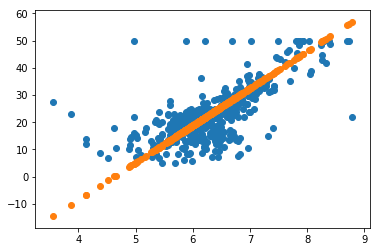

In [17]:
X_rm = X[:, 5]
k = 13.654376019728504
b = -63.08274310151789
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)

## Edit Distance

In [18]:
solution1 = {}

In [19]:
from functools import lru_cache

In [20]:
@lru_cache(maxsize=2**10)
def edit_distance(string1, string2):    
    if len(string1) == 0: 
#         candidates = [(edit_distance(string1, string2[:-1]) + 1, 'ADD {}'.format(tail_s2))]
        return len(string2)
    if len(string2) == 0: 
#         candidates = [(edit_distance(string2, string1[:-1]) + 1, 'ADD {}'.format(tail_s1))]
        return len(string1)    
    tail_s1 = string1[-1]

    tail_s2 = string2[-1]

    candidates = [
        (edit_distance(string1[:-1], string2) + 1, 'DEL {}'.format(tail_s1)),  # string 1 delete tail
        (edit_distance(string1, string2[:-1]) + 1, 'ADD {}'.format(tail_s2)),  # string 1 add tail of string2
    ] 
  
    if tail_s1 == tail_s2:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 0, '')
    else:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 1, 'SUB {} => {}'.format(tail_s1, tail_s2))
    both_forward
    candidates.append(both_forward)
  
    min_distance, operation = min(candidates, key=lambda x: x[0])

    solution1[(string1, string2)] = operation

    return min_distance

In [21]:
edit_distance('CABC','ABC')

1

In [22]:
solution1

{('C', 'A'): 'SUB C => A',
 ('C', 'AB'): 'ADD B',
 ('C', 'ABC'): '',
 ('CA', 'A'): '',
 ('CA', 'AB'): 'ADD B',
 ('CA', 'ABC'): 'DEL A',
 ('CAB', 'A'): 'DEL B',
 ('CAB', 'AB'): '',
 ('CAB', 'ABC'): 'ADD C',
 ('CABC', 'A'): 'DEL C',
 ('CABC', 'AB'): 'DEL C',
 ('CABC', 'ABC'): ''}

In [23]:

def parser_solution(string1,string2):
    
#     solution = {}
    
    distance = edit_distance(string1,string2)
    solution = solution1
    
    def steps(string1,string2,solution):
    
        if (string1 == string2):
             return ()
        if solution[(string1, string2)] == '':
            return steps(string1[:-1],string2[:-1],solution)
        if solution[(string1, string2)][:3] == 'SUB':
            return steps(string1[:-1],string2[:-1],solution) + (solution[(string1,string2)],)        
        if solution[(string1, string2)] [:3] == 'ADD':
            return steps(string1,string2[:-1],solution) + (solution[(string1,string2)],)
        if solution[(string1, string2)] [:3] == 'DEL':
            return steps(string1[:-1],string2,solution) + (solution[(string1,string2)],)                      

    return ('总步数：{},步骤:{}'.format(str(distance),steps(string1,string2,solution))) 
    

In [24]:
parser_solution('ABCDD','ABDCD')

"总步数：2,步骤:('ADD D', 'DEL D')"

还是考虑不周啊！！！
parser_solution('CABC','AB')会报错

In [29]:
def parser_solution(string1,string2):
    solution = {}
    distance = edit_distance(string1,string2)
    solution = solution1
    def steps(string1,string2,solution):
        
        if (string1 == string2):
            return ()
        if string2 == '':
            solution[(string1,string2)] =  'DEL {}'.format(string1[-1])
            return steps(string1[:-1],string2,solution) + (solution[(string1,string2)],)
        if string1 == '':
            solution[(string1,string2)] =  'ADD {}'.format(string2[-1])
            return steps(string1,string2[:-1],solution) + (solution[(string1,string2)],)        
        if solution[(string1, string2)] == '':
            return steps(string1[:-1],string2[:-1],solution)
        if solution[(string1, string2)][:3] == 'SUB':
            return steps(string1[:-1],string2[:-1],solution) + (solution[(string1,string2)],)        
        if solution[(string1, string2)] [:3] == 'ADD':
            return steps(string1,string2[:-1],solution) + (solution[(string1,string2)],)
        if solution[(string1, string2)] [:3] == 'DEL':
            return steps(string1[:-1],string2,solution) + (solution[(string1,string2)],)                      
    
    return ('总步数：{},步骤:{}'.format(str(distance),steps(string1,string2,solution)))   

In [30]:
parser_solution('CABC','AB')

"总步数：2,步骤:('DEL C', 'DEL C')"